In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer

In [35]:
customer_df = pd.read_csv("Data/Cleaned_Data_Marketing_Customer_Analysis_Round2.csv")

In [36]:
customer_df.dropna(inplace=True)

Text(0.5, 1.0, 'Months Since Policy Inception')

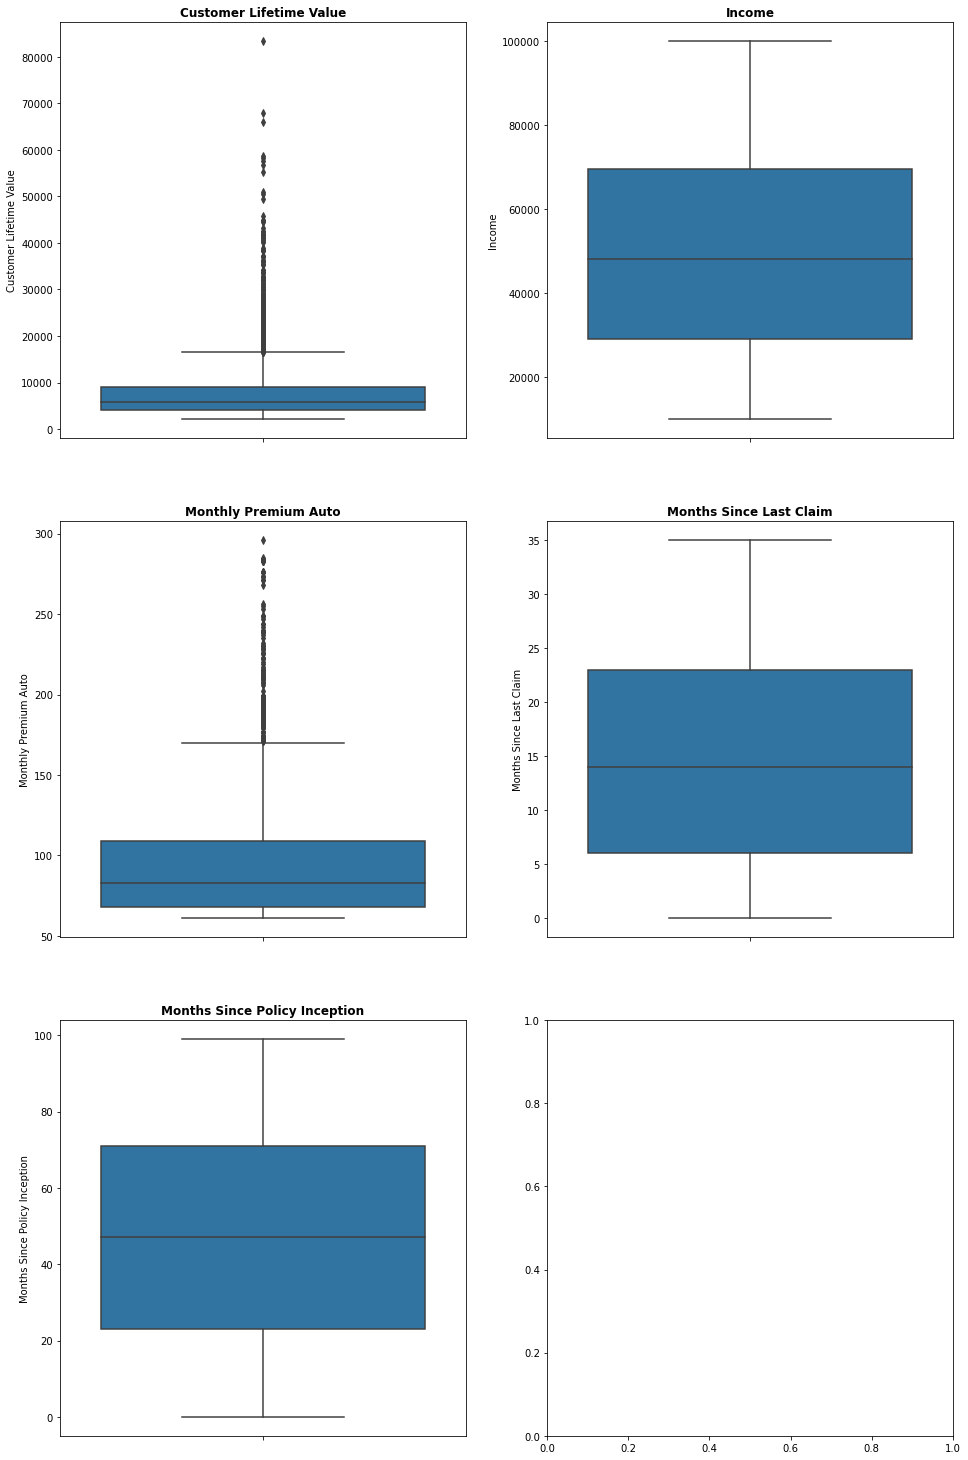

In [37]:
fig2, ax2 = plt.subplots(3,2, figsize=(16,26))

sns.boxplot(y=customer_df['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=customer_df['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=customer_df['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Policy Inception'], ax = ax2[2,0])
ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

In [38]:
#Removing outliers in Customer Lifetime Value Column

mean_clv = np.mean(customer_df['Customer Lifetime Value'])
std_clv = np.std(customer_df['Customer Lifetime Value'])

threshold = 2
outliers_clv = []
for i in customer_df['Customer Lifetime Value']:
    z = (i-mean_clv)/std_clv
    if z > threshold:
        outliers_clv.append(i)
print(outliers_clv)

[22332.44, 32474.77, 24278.1, 42561.63, 26180.81, 27528.31, 25807.06, 23594.68, 22721.47, 30763.26, 32450.39, 36293.15, 24127.5, 24108.3, 23740.12, 25390.55, 26843.12, 25997.75, 23331.83, 23984.62, 26576.32, 26453.94, 23594.68, 57520.5, 22658.54, 24543.2, 33718.84, 26197.41, 22658.54, 30061.69, 35227.3, 26413.55, 22399.13, 22940.38, 25401.52, 37111.66, 28432.0, 58166.55, 26511.6, 36229.41, 23813.52, 27789.69, 22986.15, 34090.04, 41745.01, 36057.54, 25640.24, 24127.5, 45708.65, 41787.9, 25464.82, 41787.9, 24723.18, 28685.83, 38887.9, 22658.54, 41075.43, 27430.14, 26864.2, 33473.35, 44856.11, 26763.83, 24636.97, 56675.94, 38230.21, 38496.95, 35440.14, 25030.38, 27934.62, 23444.9, 27495.42, 25464.82, 27789.69, 26243.86, 23675.03, 44468.02, 27789.69, 26122.13, 23594.68, 32725.3, 24709.6, 32069.88, 44795.47, 29973.42, 25626.71, 22332.44, 27789.69, 30442.54, 41491.74, 23594.68, 26232.85, 51016.07, 36946.06, 40688.53, 42389.01, 22563.62, 29091.24, 22951.89, 30718.81, 25002.02, 26730.06, 32864

In [39]:
customer_df = customer_df[customer_df['Customer Lifetime Value'].isin(outliers_clv) == False]

Text(0.5, 1.0, 'Months Since Policy Inception')

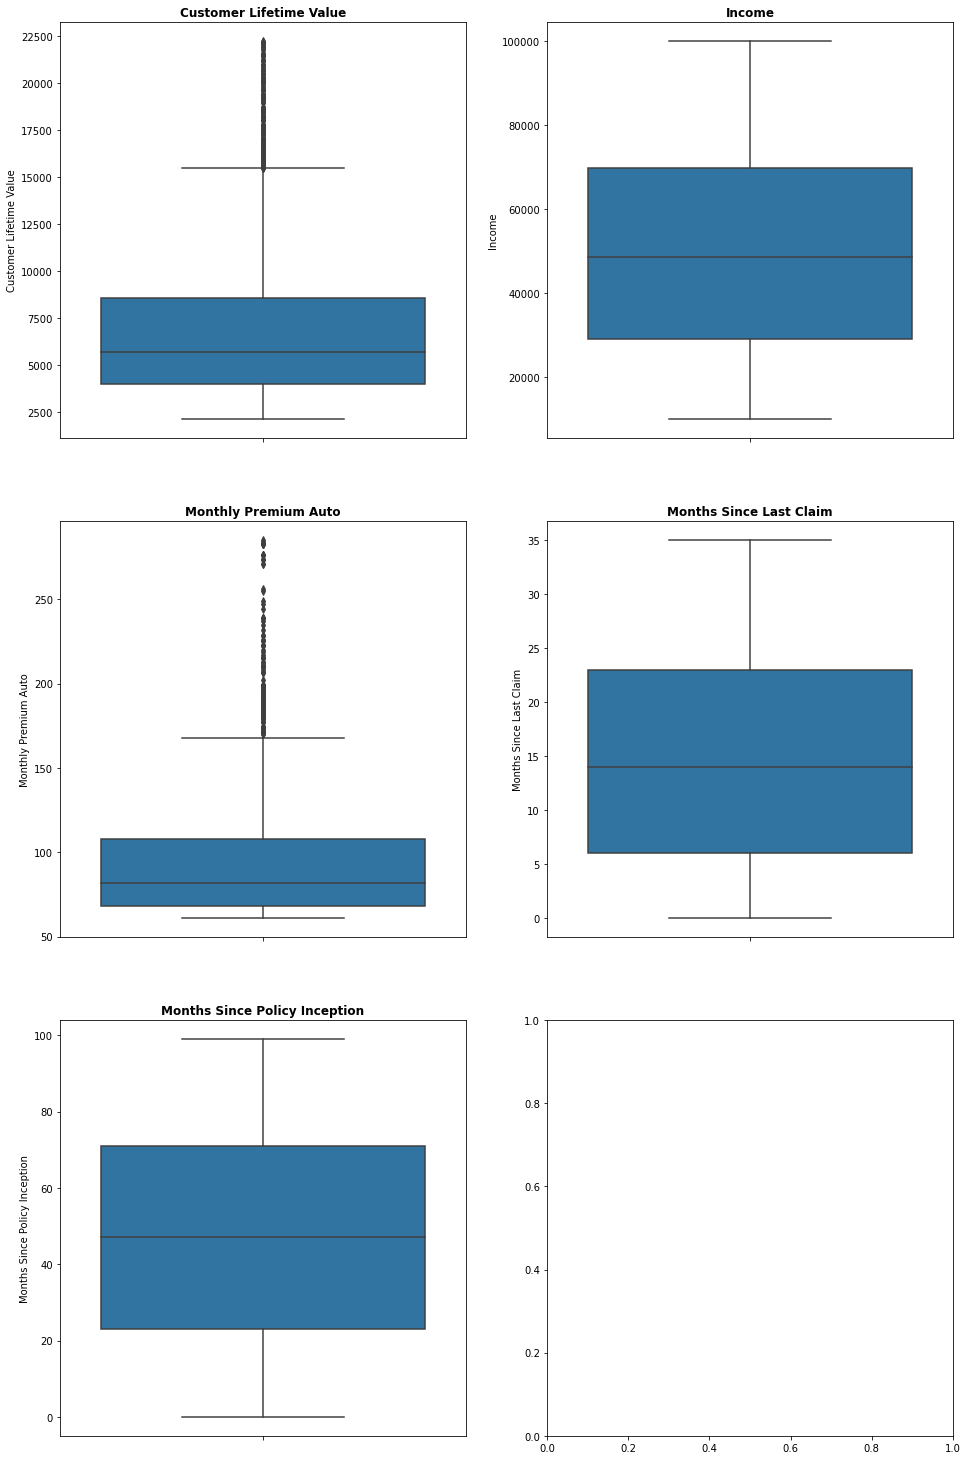

In [40]:
fig2, ax2 = plt.subplots(3,2, figsize=(16,26))

sns.boxplot(y=customer_df['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=customer_df['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=customer_df['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Policy Inception'], ax = ax2[2,0])
ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

In [41]:
# X y Split 

X = customer_df.drop('Total Claim Amount', axis=1)

y = customer_df['Total Claim Amount'] #target variable

In [42]:
# split X to numeric and categorical for transformation

X_numeric = X._get_numeric_data()
X_numeric.drop(columns=['Number of Open Complaints','Number of Policies'], inplace=True)

X_categorical = X.select_dtypes(np.object)

X_categorical['Number of Open Complaints'] = customer_df['Number of Open Complaints']
X_categorical['Number of Policies'] = customer_df['Number of Policies']
X_categorical.drop('Customer', axis=1, inplace=True)

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_32302/520087021.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_categorical = X.select_dtypes(np.object)
/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_32302/520087021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['Number of Open Complaints'] = customer_df['Number of Open Complaints']
/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_32302/520087021.py:9: SettingWithCopyWarning: 
A valu

In [43]:
# Get dummies for categorical variables

X_categorical=pd.get_dummies(X_categorical, drop_first=True)

In [44]:
# Concatenate numerical and categorical dataframes 

X = pd.concat([X_numeric, X_categorical], axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
2,14947.92,22139.0,100,34.0,31,0.0,2,0,0,0,...,0,1,0,0,0,1,0,0,1,0
10,5154.76,82730.0,127,13.0,31,0.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
13,5454.59,66334.0,69,25.0,25,0.0,4,1,0,0,...,0,1,0,0,0,0,0,1,1,0
16,5326.68,76717.0,66,26.0,10,0.0,6,1,0,0,...,0,1,0,0,0,0,0,1,0,0
18,2736.35,17533.0,73,10.0,1,0.0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,9075.77,37722.0,116,8.0,23,0.0,8,0,0,0,...,0,0,0,0,0,0,1,0,1,0
10865,3579.02,28304.0,91,10.0,30,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10866,2771.66,59855.0,74,30.0,82,4.0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
10869,5259.44,61146.0,65,7.0,68,0.0,6,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [45]:
# checking for highly correlated columns

correlated_features = set()
correlation_matrix = X.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

set()


In [46]:
# Data splitting (just numerical columns) - TRAIN / TEST

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=123)

In [47]:
# Standardize the data 

#TRAIN

std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)

In [48]:
#TEST

X_test_scaled=std_scaler.transform(X_test)

In [50]:
# Model fitting 

model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

In [51]:
#coefficients

model.coef_

array([ 6.33008908e-01, -6.83543079e+00,  1.66050616e+02, -4.40564455e-01,
       -2.27670062e+00, -6.46390237e-01,  3.67867712e+00,  1.71349353e+00,
       -2.42444452e+00, -1.94809320e+00,  9.24285033e-01, -1.96928847e+00,
       -1.03557198e+01, -9.05016247e+00, -2.50081431e+00, -1.16108435e+00,
       -1.45081456e+00, -5.16291990e+00,  2.58294713e+00, -1.98472753e-01,
       -5.62094959e-01, -3.86759351e+00, -1.25586699e+00, -3.92677676e+00,
        2.20419190e+00,  4.82044508e-01,  1.92151715e+00, -1.30778753e+00,
       -3.72776418e+00,  1.41665972e+00, -2.22936454e+00, -2.30055306e+00,
       -1.33804072e+00,  6.74230653e-01,  1.66166952e+00, -4.56805266e+00,
        7.04806828e-01, -9.32987395e-01,  2.67018833e+00,  2.25825133e+00,
       -4.78269621e+00, -1.70617255e+00,  2.92295639e+00, -3.26915364e+00,
        5.18507767e+00, -1.67463286e+00, -3.00154950e+00, -2.55451255e+00,
       -1.39315206e+00,  7.75103874e-01, -2.05678589e+00,  4.40488074e-01,
       -1.51646521e+00, -

In [52]:
#intercept

model.intercept_

374.41564446601075

In [53]:
#score of the model (R2) on test

R2 = model.score(X_test_scaled, y_test)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.7952994794565651
0.7695615761684952


In [54]:
#score of the model (R2) on train

R2 = model.score(X_train_scaled, y_train)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.80001953974004
0.7748751105416667


In [55]:
#prediciton

y_pred=model.predict(X_test_scaled)

In [56]:
y_pred

array([ 5.59585303e+02,  4.84181497e+02,  6.24248799e+02,  5.19928645e+02,
        1.21080209e+03,  1.94194244e+02,  4.31560515e+02,  3.30499823e+01,
        5.64195595e+02,  4.84917926e+02,  4.92646917e+02,  3.41522455e+02,
        5.85313070e+02,  3.17932144e+01,  4.28456799e+02,  4.15219997e+02,
        4.76186155e+02,  4.59738049e+02,  4.22865329e+02,  3.86264078e+02,
        2.32646831e+02,  1.93919565e+02,  2.44644299e+02,  2.84573420e+02,
        6.26148242e+02,  5.37813007e+02,  4.34591765e+02,  2.73938743e+02,
        3.67502374e+02,  4.75678081e+02,  3.82764557e+02,  4.08695595e+02,
        3.10317972e+01,  3.54603374e+02,  2.04570595e+02, -8.21440812e+00,
        3.97601059e+02,  8.56729160e+02,  4.51250507e+02,  1.40076764e+03,
        2.04302136e+02,  1.32651836e+00,  4.26889557e+02,  5.56888315e+02,
        5.52233333e+02,  3.91337747e+02,  4.13827057e+02,  3.93483307e+02,
        4.41052603e+02,  2.96866205e+02,  4.27036980e+02,  3.84396891e+02,
        3.06017913e+02,  

In [57]:
y_test

9929      674.97
10658     462.04
5642       19.46
4448      470.40
8637     1294.70
          ...   
5825       48.94
55       2294.63
8446      331.20
7820      131.81
7792       61.72
Name: Total Claim Amount, Length: 959, dtype: float64

In [58]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
9929,674.97,559.585303
10658,462.04,484.181497
5642,19.46,624.248799
4448,470.40,519.928645
8637,1294.70,1210.802091
...,...,...
5825,48.94,32.800549
55,2294.63,1204.835168
8446,331.20,445.195381
7820,131.81,29.520228


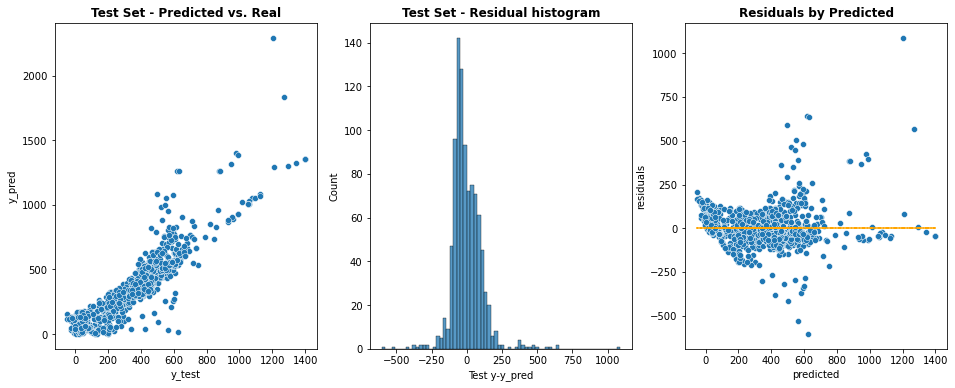

In [59]:
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=y_pred, y=y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(y_test-y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = y_pred,y = y_test - y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed', color='orange')

In [60]:
#Model validation

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

MSE = mse(y_test,y_pred)
MAE = mae(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(MSE)
print(MAE)
print(RMSE)

13099.718529053413
78.03335660187929
114.45400180445161


In [61]:
#Feature Importance

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [62]:
features_importances

,Attribute,Importance
90,Policy_Personal L3,1.663145e+14
84,Policy Type_Personal Auto,1.491050e+14
89,Policy_Personal L2,1.414333e+14
88,Policy_Personal L1,1.157869e+14
85,Policy Type_Special Auto,6.862840e+13
...,...,...
83,Marital Status_Single,1.980471e-01
71,Effective To Date_2/5/11,1.887297e-01
60,Effective To Date_2/20/11,1.567836e-01
75,Effective To Date_2/9/11,1.041564e-01
